In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/coloR_/Desktop/Data Analysis with Numpy, Pandas and Matplotlib/Numpy, Pandas and Matplotlib/csgo_games.csv")

In [3]:
df.head()

,match_date,team_1,team_2,t1_points,t2_points,t1_world_rank,t2_world_rank,t1_h2h_win_perc,t2_h2h_win_perc,winner,...,t2_player5_dpr,t2_player5_spr,t2_player5_opk_ratio,t2_player5_opk_rating,t2_player5_wins_perc_after_fk,t2_player5_fk_perc_in_wins,t2_player5_multikill_perc,t2_player5_rating_at_least_one_perc,t2_player5_is_sniper,t2_player5_clutch_win_perc
0,2016-12-18,CLOUD9,HELLRAISERS,13,16,9,20,0.500000,0.500000,t2,...,0.63,0.10,1.05,0.92,0.733,0.104,0.147018,0.528,False,0.666667
1,2016-12-18,IMMORTALS,G2,17,19,13,10,0.500000,0.500000,t2,...,0.69,0.09,0.85,0.96,0.739,0.147,0.135810,0.438,True,0.406250
2,2016-12-18,MOUSESPORTS,IMMORTALS,16,3,12,13,0.500000,0.500000,t1,...,0.67,0.07,0.79,0.94,0.723,0.129,0.148257,0.526,False,0.733333
3,2016-12-18,DIGNITAS,G2,16,9,6,10,0.416667,0.583333,t1,...,0.69,0.09,0.85,0.96,0.739,0.147,0.135810,0.438,True,0.406250
4,2016-12-18,OPTIC,HELLRAISERS,16,10,4,20,0.500000,0.500000,t1,...,0.63,0.10,1.05,0.92,0.733,0.104,0.147018,0.528,False,0.666667


In [4]:
df.shape

(3787, 170)

We have 3787 rows and 170 columns

# Data cleaning


Removing columns which are not necessary for my analysis

In [5]:
#For Team 1 - Player 1
df.drop(columns=["t1_player1_apr","t1_player1_dpr","t1_player1_spr","t1_player1_opk_ratio","t1_player1_opk_rating","t1_player1_wins_perc_after_fk","t1_player1_fk_perc_in_wins","t1_player1_multikill_perc","t1_player1_rating_at_least_one_perc","t1_player1_clutch_win_perc","t1_player1_kpr","t1_player1_rating","t1_player1_kdr","t1_player1_dmr"],inplace = True)

In [6]:
t1 = [2,3,4,5]
t2 = [1,2,3,4,5]

In [7]:
#Similarly for other players
for n in t1: 
    df.drop(columns=[f"t1_player{n}_apr",f"t1_player{n}_dpr",f"t1_player{n}_spr",f"t1_player{n}_opk_ratio",f"t1_player{n}_opk_rating",f"t1_player{n}_wins_perc_after_fk",f"t1_player{n}_fk_perc_in_wins",f"t1_player{n}_multikill_perc",f"t1_player{n}_rating_at_least_one_perc",f"t1_player{n}_clutch_win_perc",f"t1_player{n}_kpr",f"t1_player{n}_rating",f"t1_player{n}_kdr",f"t1_player{n}_dmr"],inplace = True)
for n in t2:
    df.drop(columns=[f"t2_player{n}_apr",f"t2_player{n}_dpr",f"t2_player{n}_spr",f"t2_player{n}_opk_ratio",f"t2_player{n}_opk_rating",f"t2_player{n}_wins_perc_after_fk",f"t2_player{n}_fk_perc_in_wins",f"t2_player{n}_multikill_perc",f"t2_player{n}_rating_at_least_one_perc",f"t2_player{n}_clutch_win_perc",f"t2_player{n}_kpr",f"t2_player{n}_rating",f"t2_player{n}_kdr",f"t2_player{n}_dmr"],inplace = True)
df.head()

,match_date,team_1,team_2,t1_points,t2_points,t1_world_rank,t2_world_rank,t1_h2h_win_perc,t2_h2h_win_perc,winner,...,t2_player1_impact,t2_player1_is_sniper,t2_player2_impact,t2_player2_is_sniper,t2_player3_impact,t2_player3_is_sniper,t2_player4_impact,t2_player4_is_sniper,t2_player5_impact,t2_player5_is_sniper
0,2016-12-18,CLOUD9,HELLRAISERS,13,16,9,20,0.500000,0.500000,t2,...,1.40,False,1.02,False,1.07,True,0.99,False,0.88,False
1,2016-12-18,IMMORTALS,G2,17,19,13,10,0.500000,0.500000,t2,...,1.25,True,1.08,False,1.00,False,0.88,False,0.93,True
2,2016-12-18,MOUSESPORTS,IMMORTALS,16,3,12,13,0.500000,0.500000,t1,...,1.24,True,1.35,False,1.11,False,1.00,False,1.00,False
3,2016-12-18,DIGNITAS,G2,16,9,6,10,0.416667,0.583333,t1,...,1.25,True,1.08,False,1.00,False,0.88,False,0.93,True
4,2016-12-18,OPTIC,HELLRAISERS,16,10,4,20,0.500000,0.500000,t1,...,1.40,False,1.02,False,1.07,True,0.99,False,0.88,False


In [8]:
df.shape

(3787, 30)

We reduced the number of columns from 170 to 30

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3787 entries, 0 to 3786
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   match_date            3787 non-null   object 
 1   team_1                3787 non-null   object 
 2   team_2                3787 non-null   object 
 3   t1_points             3787 non-null   int64  
 4   t2_points             3787 non-null   int64  
 5   t1_world_rank         3787 non-null   int64  
 6   t2_world_rank         3787 non-null   int64  
 7   t1_h2h_win_perc       3787 non-null   float64
 8   t2_h2h_win_perc       3787 non-null   float64
 9   winner                3787 non-null   object 
 10  t1_player1_impact     3787 non-null   float64
 11  t1_player1_is_sniper  3787 non-null   bool   
 12  t1_player2_impact     3787 non-null   float64
 13  t1_player2_is_sniper  3787 non-null   bool   
 14  t1_player3_impact     3787 non-null   float64
 15  t1_player3_is_sniper 

Here we can see that not all columns in t1_points, t2_points are proper as some are 2-0 3-1 which can be categoriesd as series score not match score as match can only end in a 16 -x scoreline. We only want to consider individual matches between teams as series consists of multiple games and hence our data can become inaccurate.

In [10]:
df.rename(columns={"t1_points":"t1_match_score","t2_points":"t2_match_score"},inplace=True)

In [11]:
data = df[ (df['t1_match_score'] <= 3) & (df['t2_match_score'] != 16) ].index
df.drop(data,inplace=True)

In [12]:
data = df[ (df['t2_match_score'] <= 3) & (df['t1_match_score'] != 16) ].index
df.drop(data,inplace = True)

In [13]:
df

,match_date,team_1,team_2,t1_match_score,t2_match_score,t1_world_rank,t2_world_rank,t1_h2h_win_perc,t2_h2h_win_perc,winner,...,t2_player1_impact,t2_player1_is_sniper,t2_player2_impact,t2_player2_is_sniper,t2_player3_impact,t2_player3_is_sniper,t2_player4_impact,t2_player4_is_sniper,t2_player5_impact,t2_player5_is_sniper
0,2016-12-18,CLOUD9,HELLRAISERS,13,16,9,20,0.500000,0.500000,t2,...,1.40,False,1.02,False,1.07,True,0.99,False,0.88,False
1,2016-12-18,IMMORTALS,G2,17,19,13,10,0.500000,0.500000,t2,...,1.25,True,1.08,False,1.00,False,0.88,False,0.93,True
2,2016-12-18,MOUSESPORTS,IMMORTALS,16,3,12,13,0.500000,0.500000,t1,...,1.24,True,1.35,False,1.11,False,1.00,False,1.00,False
3,2016-12-18,DIGNITAS,G2,16,9,6,10,0.416667,0.583333,t1,...,1.25,True,1.08,False,1.00,False,0.88,False,0.93,True
4,2016-12-18,OPTIC,HELLRAISERS,16,10,4,20,0.500000,0.500000,t1,...,1.40,False,1.02,False,1.07,True,0.99,False,0.88,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3621,2020-06-01,EVIL GENIUSES,100 THIEVES,16,12,9,11,0.684211,0.315789,t1,...,1.25,False,1.08,False,1.18,True,0.92,False,0.93,False
3622,2020-06-01,FURIA,MIBR,13,16,8,18,0.857143,0.142857,t2,...,1.17,True,1.15,False,1.17,True,1.00,False,0.84,False
3623,2020-06-01,FNATIC,MAD LIONS,10,16,3,12,1.000000,0.000000,t2,...,1.27,False,1.13,False,1.05,True,0.97,False,0.86,False
3624,2020-06-01,ASTRALIS,NIP,7,16,1,13,0.500000,0.500000,t2,...,1.16,False,1.04,True,1.11,False,1.03,False,1.03,True


Now we can check the number of rounds played between each teams -

In [14]:
df["No_of_rounds_played"] = df["t1_match_score"]+df["t2_match_score"]
df

,match_date,team_1,team_2,t1_match_score,t2_match_score,t1_world_rank,t2_world_rank,t1_h2h_win_perc,t2_h2h_win_perc,winner,...,t2_player1_is_sniper,t2_player2_impact,t2_player2_is_sniper,t2_player3_impact,t2_player3_is_sniper,t2_player4_impact,t2_player4_is_sniper,t2_player5_impact,t2_player5_is_sniper,No_of_rounds_played
0,2016-12-18,CLOUD9,HELLRAISERS,13,16,9,20,0.500000,0.500000,t2,...,False,1.02,False,1.07,True,0.99,False,0.88,False,29
1,2016-12-18,IMMORTALS,G2,17,19,13,10,0.500000,0.500000,t2,...,True,1.08,False,1.00,False,0.88,False,0.93,True,36
2,2016-12-18,MOUSESPORTS,IMMORTALS,16,3,12,13,0.500000,0.500000,t1,...,True,1.35,False,1.11,False,1.00,False,1.00,False,19
3,2016-12-18,DIGNITAS,G2,16,9,6,10,0.416667,0.583333,t1,...,True,1.08,False,1.00,False,0.88,False,0.93,True,25
4,2016-12-18,OPTIC,HELLRAISERS,16,10,4,20,0.500000,0.500000,t1,...,False,1.02,False,1.07,True,0.99,False,0.88,False,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3621,2020-06-01,EVIL GENIUSES,100 THIEVES,16,12,9,11,0.684211,0.315789,t1,...,False,1.08,False,1.18,True,0.92,False,0.93,False,28
3622,2020-06-01,FURIA,MIBR,13,16,8,18,0.857143,0.142857,t2,...,True,1.15,False,1.17,True,1.00,False,0.84,False,29
3623,2020-06-01,FNATIC,MAD LIONS,10,16,3,12,1.000000,0.000000,t2,...,False,1.13,False,1.05,True,0.97,False,0.86,False,26
3624,2020-06-01,ASTRALIS,NIP,7,16,1,13,0.500000,0.500000,t2,...,False,1.04,True,1.11,False,1.03,False,1.03,True,23


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 3783
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   match_date            2061 non-null   object 
 1   team_1                2061 non-null   object 
 2   team_2                2061 non-null   object 
 3   t1_match_score        2061 non-null   int64  
 4   t2_match_score        2061 non-null   int64  
 5   t1_world_rank         2061 non-null   int64  
 6   t2_world_rank         2061 non-null   int64  
 7   t1_h2h_win_perc       2061 non-null   float64
 8   t2_h2h_win_perc       2061 non-null   float64
 9   winner                2061 non-null   object 
 10  t1_player1_impact     2061 non-null   float64
 11  t1_player1_is_sniper  2061 non-null   bool   
 12  t1_player2_impact     2061 non-null   float64
 13  t1_player2_is_sniper  2061 non-null   bool   
 14  t1_player3_impact     2061 non-null   float64
 15  t1_player3_is_sniper 

In [16]:
df['winners'] = np.where(df['winner'] == "t2", df['team_2'], df['winner'])
df['winners'] = np.where(df['winners'] == "t1", df['team_1'], df['winners'])
draws = df[(df["winners"]=="draw")].index
df.drop(draws,inplace=True)
df.rename(columns={"winner":"result"},inplace=True)
df

,match_date,team_1,team_2,t1_match_score,t2_match_score,t1_world_rank,t2_world_rank,t1_h2h_win_perc,t2_h2h_win_perc,result,...,t2_player2_impact,t2_player2_is_sniper,t2_player3_impact,t2_player3_is_sniper,t2_player4_impact,t2_player4_is_sniper,t2_player5_impact,t2_player5_is_sniper,No_of_rounds_played,winners
0,2016-12-18,CLOUD9,HELLRAISERS,13,16,9,20,0.500000,0.500000,t2,...,1.02,False,1.07,True,0.99,False,0.88,False,29,HELLRAISERS
1,2016-12-18,IMMORTALS,G2,17,19,13,10,0.500000,0.500000,t2,...,1.08,False,1.00,False,0.88,False,0.93,True,36,G2
2,2016-12-18,MOUSESPORTS,IMMORTALS,16,3,12,13,0.500000,0.500000,t1,...,1.35,False,1.11,False,1.00,False,1.00,False,19,MOUSESPORTS
3,2016-12-18,DIGNITAS,G2,16,9,6,10,0.416667,0.583333,t1,...,1.08,False,1.00,False,0.88,False,0.93,True,25,DIGNITAS
4,2016-12-18,OPTIC,HELLRAISERS,16,10,4,20,0.500000,0.500000,t1,...,1.02,False,1.07,True,0.99,False,0.88,False,26,OPTIC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3621,2020-06-01,EVIL GENIUSES,100 THIEVES,16,12,9,11,0.684211,0.315789,t1,...,1.08,False,1.18,True,0.92,False,0.93,False,28,EVIL GENIUSES
3622,2020-06-01,FURIA,MIBR,13,16,8,18,0.857143,0.142857,t2,...,1.15,False,1.17,True,1.00,False,0.84,False,29,MIBR
3623,2020-06-01,FNATIC,MAD LIONS,10,16,3,12,1.000000,0.000000,t2,...,1.13,False,1.05,True,0.97,False,0.86,False,26,MAD LIONS
3624,2020-06-01,ASTRALIS,NIP,7,16,1,13,0.500000,0.500000,t2,...,1.04,True,1.11,False,1.03,False,1.03,True,23,NIP


In [17]:
df.sort_values(by='match_date',inplace =True)
df

,match_date,team_1,team_2,t1_match_score,t2_match_score,t1_world_rank,t2_world_rank,t1_h2h_win_perc,t2_h2h_win_perc,result,...,t2_player2_impact,t2_player2_is_sniper,t2_player3_impact,t2_player3_is_sniper,t2_player4_impact,t2_player4_is_sniper,t2_player5_impact,t2_player5_is_sniper,No_of_rounds_played,winners
917,2016-01-22,NATUS VINCERE,SK,16,3,2,19,1.000000,0.000000,t1,...,0.96,False,0.73,True,1.00,False,1.17,False,19,NATUS VINCERE
916,2016-01-22,LUMINOSITY,FAZE,9,16,6,8,1.000000,0.000000,t2,...,1.01,False,0.95,False,1.01,True,0.76,False,25,FAZE
915,2016-01-22,ASTRALIS,DIGNITAS,16,9,4,14,0.666667,0.333333,t1,...,0.90,False,1.03,False,1.15,False,1.38,False,25,ASTRALIS
914,2016-01-22,NATUS VINCERE,FAZE,16,9,2,8,0.461538,0.538462,t1,...,1.01,False,0.95,False,1.01,True,0.76,False,25,NATUS VINCERE
913,2016-01-22,MOUSESPORTS,ASTRALIS,19,22,12,4,0.333333,0.666667,t2,...,1.22,False,0.89,False,0.98,False,0.76,True,41,ASTRALIS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3619,2020-06-02,FURIA,GEN.G,16,8,8,14,0.333333,0.666667,t1,...,1.05,False,1.04,True,0.95,False,0.80,False,24,FURIA
3616,2020-06-03,EVIL GENIUSES,CLOUD9,16,14,9,16,0.333333,0.666667,t1,...,1.06,True,1.05,True,0.97,False,0.81,False,30,EVIL GENIUSES
3617,2020-06-03,ASTRALIS,VITALITY,6,16,2,10,0.750000,0.250000,t2,...,0.96,False,0.89,False,0.95,False,0.95,False,22,VITALITY
3618,2020-06-03,FNATIC,MOUSESPORTS,16,14,3,5,0.437500,0.562500,t1,...,1.02,False,1.01,True,0.79,True,0.90,False,30,FNATIC


In [18]:
df.to_csv("csgo_clean_data.csv",index = False)

In [19]:
newdata = "C:/Users/coloR_/Desktop/Data Analysis with Numpy, Pandas and Matplotlib/Numpy, Pandas and Matplotlib/csgo_clean_data.csv"
df = pd.read_csv(newdata)
df['match_date']=pd.to_datetime(df['match_date'])
df["match_day_month"] = df["match_date"].dt.strftime("%d %B")
df

,match_date,team_1,team_2,t1_match_score,t2_match_score,t1_world_rank,t2_world_rank,t1_h2h_win_perc,t2_h2h_win_perc,result,...,t2_player2_is_sniper,t2_player3_impact,t2_player3_is_sniper,t2_player4_impact,t2_player4_is_sniper,t2_player5_impact,t2_player5_is_sniper,No_of_rounds_played,winners,match_day_month
0,2016-01-22,NATUS VINCERE,SK,16,3,2,19,1.000000,0.000000,t1,...,False,0.73,True,1.00,False,1.17,False,19,NATUS VINCERE,22 January
1,2016-01-22,LUMINOSITY,FAZE,9,16,6,8,1.000000,0.000000,t2,...,False,0.95,False,1.01,True,0.76,False,25,FAZE,22 January
2,2016-01-22,ASTRALIS,DIGNITAS,16,9,4,14,0.666667,0.333333,t1,...,False,1.03,False,1.15,False,1.38,False,25,ASTRALIS,22 January
3,2016-01-22,NATUS VINCERE,FAZE,16,9,2,8,0.461538,0.538462,t1,...,False,0.95,False,1.01,True,0.76,False,25,NATUS VINCERE,22 January
4,2016-01-22,MOUSESPORTS,ASTRALIS,19,22,12,4,0.333333,0.666667,t2,...,False,0.89,False,0.98,False,0.76,True,41,ASTRALIS,22 January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,2020-06-02,FURIA,GEN.G,16,8,8,14,0.333333,0.666667,t1,...,False,1.04,True,0.95,False,0.80,False,24,FURIA,02 June
2042,2020-06-03,EVIL GENIUSES,CLOUD9,16,14,9,16,0.333333,0.666667,t1,...,True,1.05,True,0.97,False,0.81,False,30,EVIL GENIUSES,03 June
2043,2020-06-03,ASTRALIS,VITALITY,6,16,2,10,0.750000,0.250000,t2,...,False,0.89,False,0.95,False,0.95,False,22,VITALITY,03 June
2044,2020-06-03,FNATIC,MOUSESPORTS,16,14,3,5,0.437500,0.562500,t1,...,False,1.01,True,0.79,True,0.90,False,30,FNATIC,03 June


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2046 entries, 0 to 2045
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   match_date            2046 non-null   datetime64[ns]
 1   team_1                2046 non-null   object        
 2   team_2                2046 non-null   object        
 3   t1_match_score        2046 non-null   int64         
 4   t2_match_score        2046 non-null   int64         
 5   t1_world_rank         2046 non-null   int64         
 6   t2_world_rank         2046 non-null   int64         
 7   t1_h2h_win_perc       2046 non-null   float64       
 8   t2_h2h_win_perc       2046 non-null   float64       
 9   result                2046 non-null   object        
 10  t1_player1_impact     2046 non-null   float64       
 11  t1_player1_is_sniper  2046 non-null   bool          
 12  t1_player2_impact     2046 non-null   float64       
 13  t1_player2_is_snip

# Data Analysis
Now our data is ready to be used for analysis

By examining the data I have come up with some interesting question which help determine teams performance, player's performance as well as the relation between them.

-------------

### Overall
#### 1) Max rounds played by teams
#### 2) Number of close matches (4 round diff) and one sided matches (>10 rounds).
#### 3) No of matches each year
#### 4)  Most number of wins by a team every year.
#### 5) Number of times same matches happened.
#### 6) Ranking of a individual team over the year and over the years and compare              two teams
#### 7) Top 10 teams in a year.
#### 8) Players impact (Snipers vs Non snipers).

-------------------------------------------------------------------------------

#### 1) Max rounds played by teams

In [21]:
df

,match_date,team_1,team_2,t1_match_score,t2_match_score,t1_world_rank,t2_world_rank,t1_h2h_win_perc,t2_h2h_win_perc,result,...,t2_player2_is_sniper,t2_player3_impact,t2_player3_is_sniper,t2_player4_impact,t2_player4_is_sniper,t2_player5_impact,t2_player5_is_sniper,No_of_rounds_played,winners,match_day_month
0,2016-01-22,NATUS VINCERE,SK,16,3,2,19,1.000000,0.000000,t1,...,False,0.73,True,1.00,False,1.17,False,19,NATUS VINCERE,22 January
1,2016-01-22,LUMINOSITY,FAZE,9,16,6,8,1.000000,0.000000,t2,...,False,0.95,False,1.01,True,0.76,False,25,FAZE,22 January
2,2016-01-22,ASTRALIS,DIGNITAS,16,9,4,14,0.666667,0.333333,t1,...,False,1.03,False,1.15,False,1.38,False,25,ASTRALIS,22 January
3,2016-01-22,NATUS VINCERE,FAZE,16,9,2,8,0.461538,0.538462,t1,...,False,0.95,False,1.01,True,0.76,False,25,NATUS VINCERE,22 January
4,2016-01-22,MOUSESPORTS,ASTRALIS,19,22,12,4,0.333333,0.666667,t2,...,False,0.89,False,0.98,False,0.76,True,41,ASTRALIS,22 January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,2020-06-02,FURIA,GEN.G,16,8,8,14,0.333333,0.666667,t1,...,False,1.04,True,0.95,False,0.80,False,24,FURIA,02 June
2042,2020-06-03,EVIL GENIUSES,CLOUD9,16,14,9,16,0.333333,0.666667,t1,...,True,1.05,True,0.97,False,0.81,False,30,EVIL GENIUSES,03 June
2043,2020-06-03,ASTRALIS,VITALITY,6,16,2,10,0.750000,0.250000,t2,...,False,0.89,False,0.95,False,0.95,False,22,VITALITY,03 June
2044,2020-06-03,FNATIC,MOUSESPORTS,16,14,3,5,0.437500,0.562500,t1,...,False,1.01,True,0.79,True,0.90,False,30,FNATIC,03 June


In [22]:
df["No_of_rounds_played"].max()

66

In [23]:
big_matches = df.loc[df["No_of_rounds_played"]>=50,["team_1","team_2","No_of_rounds_played"]]
big_matches

,team_1,team_2,No_of_rounds_played
133,FLIPSID3,MOUSESPORTS,59
320,HEROIC,ENVY,65
367,MOUSESPORTS,VIRTUS.PRO,53
383,CLOUD9,IMMORTALS,52
684,NIP,ASTRALIS,52
961,CLG,FNATIC,59
987,CLOUD9,NATUS VINCERE,66
1339,GAMBIT,NATUS VINCERE,59
1650,ASTRALIS,NIP,54
1652,TYLOO,OPTIC,54


In [24]:
big_matches["Matchs"] = big_matches[["team_1","team_2"]].agg(" vs ".join,axis=1)
big_matches

,team_1,team_2,No_of_rounds_played,Matchs
133,FLIPSID3,MOUSESPORTS,59,FLIPSID3 vs MOUSESPORTS
320,HEROIC,ENVY,65,HEROIC vs ENVY
367,MOUSESPORTS,VIRTUS.PRO,53,MOUSESPORTS vs VIRTUS.PRO
383,CLOUD9,IMMORTALS,52,CLOUD9 vs IMMORTALS
684,NIP,ASTRALIS,52,NIP vs ASTRALIS
961,CLG,FNATIC,59,CLG vs FNATIC
987,CLOUD9,NATUS VINCERE,66,CLOUD9 vs NATUS VINCERE
1339,GAMBIT,NATUS VINCERE,59,GAMBIT vs NATUS VINCERE
1650,ASTRALIS,NIP,54,ASTRALIS vs NIP
1652,TYLOO,OPTIC,54,TYLOO vs OPTIC


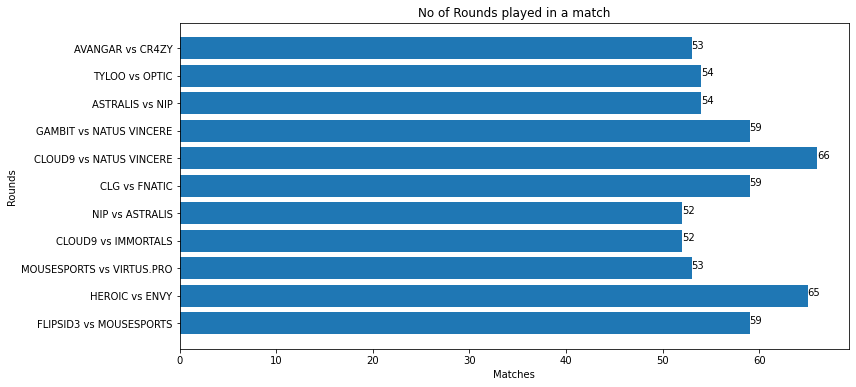

In [25]:
plt.figure(figsize=(12, 6))

plt.title("No of Rounds played in a match")
plt.xlabel("Matches")
plt.ylabel("Rounds")
x = big_matches["Matchs"]
y = big_matches["No_of_rounds_played"]
plt.barh(x,y)
for index, value in enumerate(y):
    plt.text(value, index,str(value))
plt.show()

#### Here we can see that Clound9 vs Natus Vincere was the longest match with 66 rounds played

#### 2) Number of close matches (4 round diff) and one sided matches (>10 rounds).

In [26]:
df["Round_differential"] = df["t1_match_score"] - df["t2_match_score"]

In [27]:
df['Round_differential'] = df['Round_differential'].abs()
df

,match_date,team_1,team_2,t1_match_score,t2_match_score,t1_world_rank,t2_world_rank,t1_h2h_win_perc,t2_h2h_win_perc,result,...,t2_player3_impact,t2_player3_is_sniper,t2_player4_impact,t2_player4_is_sniper,t2_player5_impact,t2_player5_is_sniper,No_of_rounds_played,winners,match_day_month,Round_differential
0,2016-01-22,NATUS VINCERE,SK,16,3,2,19,1.000000,0.000000,t1,...,0.73,True,1.00,False,1.17,False,19,NATUS VINCERE,22 January,13
1,2016-01-22,LUMINOSITY,FAZE,9,16,6,8,1.000000,0.000000,t2,...,0.95,False,1.01,True,0.76,False,25,FAZE,22 January,7
2,2016-01-22,ASTRALIS,DIGNITAS,16,9,4,14,0.666667,0.333333,t1,...,1.03,False,1.15,False,1.38,False,25,ASTRALIS,22 January,7
3,2016-01-22,NATUS VINCERE,FAZE,16,9,2,8,0.461538,0.538462,t1,...,0.95,False,1.01,True,0.76,False,25,NATUS VINCERE,22 January,7
4,2016-01-22,MOUSESPORTS,ASTRALIS,19,22,12,4,0.333333,0.666667,t2,...,0.89,False,0.98,False,0.76,True,41,ASTRALIS,22 January,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,2020-06-02,FURIA,GEN.G,16,8,8,14,0.333333,0.666667,t1,...,1.04,True,0.95,False,0.80,False,24,FURIA,02 June,8
2042,2020-06-03,EVIL GENIUSES,CLOUD9,16,14,9,16,0.333333,0.666667,t1,...,1.05,True,0.97,False,0.81,False,30,EVIL GENIUSES,03 June,2
2043,2020-06-03,ASTRALIS,VITALITY,6,16,2,10,0.750000,0.250000,t2,...,0.89,False,0.95,False,0.95,False,22,VITALITY,03 June,10
2044,2020-06-03,FNATIC,MOUSESPORTS,16,14,3,5,0.437500,0.562500,t1,...,1.01,True,0.79,True,0.90,False,30,FNATIC,03 June,2


In [28]:
close_matches = df.loc[df["Round_differential"]<=5,["team_1","team_2","Round_differential"]]
len(close_matches)

942

In [29]:
one_sided_matches = df.loc[df["Round_differential"]>=10,["team_1","team_2","Round_differential"]]
len(one_sided_matches)

457

In [30]:
normal_matches = df.loc[(df["Round_differential"]>=6) & (df["Round_differential"]<=9)]
len(normal_matches)

647

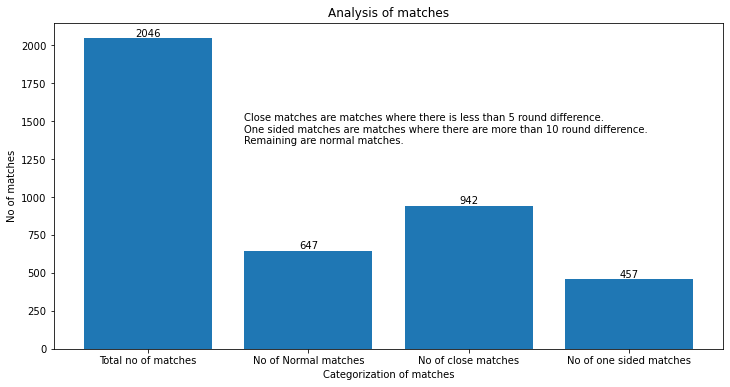

In [31]:
plt.figure(figsize=(12, 6))
plt.title("Analysis of matches")
x = ["Total no of matches","No of Normal matches","No of close matches","No of one sided matches"]
y = [len(df),len(normal_matches),len(close_matches),len(one_sided_matches)]
plt.xlabel("Categorization of matches")
plt.ylabel("No of matches")
plt.text(0.6,1350,"Close matches are matches where there is less than 5 round difference. \nOne sided matches are matches where there are more than 10 round difference. \nRemaining are normal matches.")
plt.bar(x,y)
for i in range(len(x)):
    plt.text(i, y[i], y[i], ha = "center", va = "bottom")
plt.show()

Hence we can see that there are 942 close matches and 457 one sided matches out of 2046 matches.

#### 3) No of matches per year

In [32]:
df.head()

,match_date,team_1,team_2,t1_match_score,t2_match_score,t1_world_rank,t2_world_rank,t1_h2h_win_perc,t2_h2h_win_perc,result,...,t2_player3_impact,t2_player3_is_sniper,t2_player4_impact,t2_player4_is_sniper,t2_player5_impact,t2_player5_is_sniper,No_of_rounds_played,winners,match_day_month,Round_differential
0,2016-01-22,NATUS VINCERE,SK,16,3,2,19,1.000000,0.000000,t1,...,0.73,True,1.00,False,1.17,False,19,NATUS VINCERE,22 January,13
1,2016-01-22,LUMINOSITY,FAZE,9,16,6,8,1.000000,0.000000,t2,...,0.95,False,1.01,True,0.76,False,25,FAZE,22 January,7
2,2016-01-22,ASTRALIS,DIGNITAS,16,9,4,14,0.666667,0.333333,t1,...,1.03,False,1.15,False,1.38,False,25,ASTRALIS,22 January,7
3,2016-01-22,NATUS VINCERE,FAZE,16,9,2,8,0.461538,0.538462,t1,...,0.95,False,1.01,True,0.76,False,25,NATUS VINCERE,22 January,7
4,2016-01-22,MOUSESPORTS,ASTRALIS,19,22,12,4,0.333333,0.666667,t2,...,0.89,False,0.98,False,0.76,True,41,ASTRALIS,22 January,3


In [33]:
df.match_date.dt.year.value_counts()

2017    739
2016    617
2018    515
2019    165
2020     10
Name: match_date, dtype: int64

In [34]:
df["year"] = pd.DatetimeIndex(df["match_date"]).year
df

,match_date,team_1,team_2,t1_match_score,t2_match_score,t1_world_rank,t2_world_rank,t1_h2h_win_perc,t2_h2h_win_perc,result,...,t2_player3_is_sniper,t2_player4_impact,t2_player4_is_sniper,t2_player5_impact,t2_player5_is_sniper,No_of_rounds_played,winners,match_day_month,Round_differential,year
0,2016-01-22,NATUS VINCERE,SK,16,3,2,19,1.000000,0.000000,t1,...,True,1.00,False,1.17,False,19,NATUS VINCERE,22 January,13,2016
1,2016-01-22,LUMINOSITY,FAZE,9,16,6,8,1.000000,0.000000,t2,...,False,1.01,True,0.76,False,25,FAZE,22 January,7,2016
2,2016-01-22,ASTRALIS,DIGNITAS,16,9,4,14,0.666667,0.333333,t1,...,False,1.15,False,1.38,False,25,ASTRALIS,22 January,7,2016
3,2016-01-22,NATUS VINCERE,FAZE,16,9,2,8,0.461538,0.538462,t1,...,False,1.01,True,0.76,False,25,NATUS VINCERE,22 January,7,2016
4,2016-01-22,MOUSESPORTS,ASTRALIS,19,22,12,4,0.333333,0.666667,t2,...,False,0.98,False,0.76,True,41,ASTRALIS,22 January,3,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,2020-06-02,FURIA,GEN.G,16,8,8,14,0.333333,0.666667,t1,...,True,0.95,False,0.80,False,24,FURIA,02 June,8,2020
2042,2020-06-03,EVIL GENIUSES,CLOUD9,16,14,9,16,0.333333,0.666667,t1,...,True,0.97,False,0.81,False,30,EVIL GENIUSES,03 June,2,2020
2043,2020-06-03,ASTRALIS,VITALITY,6,16,2,10,0.750000,0.250000,t2,...,False,0.95,False,0.95,False,22,VITALITY,03 June,10,2020
2044,2020-06-03,FNATIC,MOUSESPORTS,16,14,3,5,0.437500,0.562500,t1,...,True,0.79,True,0.90,False,30,FNATIC,03 June,2,2020


In [35]:
year2016 = df.loc[df["year"]==2016]
year2017 = df.loc[df["year"]==2017]
year2018 = df.loc[df["year"]==2018]
year2019 = df.loc[df["year"]==2019]
year2020 = df.loc[df["year"]==2020]

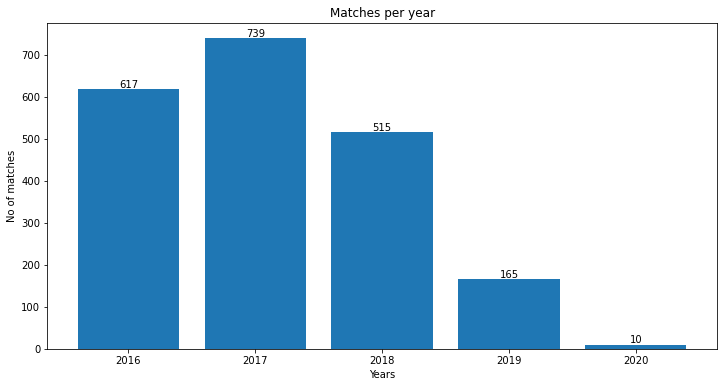

In [36]:
plt.figure(figsize=(12, 6))
plt.title("Matches per year")
x = ["2016","2017","2018","2019","2020"]
y = [len(year2016),len(year2017),len(year2018),len(year2019),len(year2020)]
plt.xlabel("Years")
plt.ylabel("No of matches")
plt.bar(x,y)
for i in range(len(x)):
    plt.text(i, y[i], y[i], ha = "center", va = "bottom")
plt.show()

#### 4)  Most number of wins by a team every year.

In [37]:
year2016

,match_date,team_1,team_2,t1_match_score,t2_match_score,t1_world_rank,t2_world_rank,t1_h2h_win_perc,t2_h2h_win_perc,result,...,t2_player3_is_sniper,t2_player4_impact,t2_player4_is_sniper,t2_player5_impact,t2_player5_is_sniper,No_of_rounds_played,winners,match_day_month,Round_differential,year
0,2016-01-22,NATUS VINCERE,SK,16,3,2,19,1.000000,0.000000,t1,...,True,1.00,False,1.17,False,19,NATUS VINCERE,22 January,13,2016
1,2016-01-22,LUMINOSITY,FAZE,9,16,6,8,1.000000,0.000000,t2,...,False,1.01,True,0.76,False,25,FAZE,22 January,7,2016
2,2016-01-22,ASTRALIS,DIGNITAS,16,9,4,14,0.666667,0.333333,t1,...,False,1.15,False,1.38,False,25,ASTRALIS,22 January,7,2016
3,2016-01-22,NATUS VINCERE,FAZE,16,9,2,8,0.461538,0.538462,t1,...,False,1.01,True,0.76,False,25,NATUS VINCERE,22 January,7,2016
4,2016-01-22,MOUSESPORTS,ASTRALIS,19,22,12,4,0.333333,0.666667,t2,...,False,0.98,False,0.76,True,41,ASTRALIS,22 January,3,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,2016-12-18,CLOUD9,HELLRAISERS,13,16,9,20,0.500000,0.500000,t2,...,True,0.99,False,0.88,False,29,HELLRAISERS,18 December,3,2016
613,2016-12-18,OPTIC,HELLRAISERS,16,10,4,20,0.500000,0.500000,t1,...,True,0.99,False,0.88,False,26,OPTIC,18 December,6,2016
614,2016-12-18,DIGNITAS,G2,16,9,6,10,0.416667,0.583333,t1,...,False,0.88,False,0.93,True,25,DIGNITAS,18 December,7,2016
615,2016-12-18,MOUSESPORTS,IMMORTALS,16,3,12,13,0.500000,0.500000,t1,...,False,1.00,False,1.00,False,19,MOUSESPORTS,18 December,13,2016


In [38]:
df['winners'].nunique()

51

#### Frequency counter

In [39]:
#For all years
from nltk.probability import FreqDist
winner_list = df["winners"]
freq_counter = FreqDist()

for winner in winner_list:
    freq_counter[winner] += 1
    
winner_count_all_years = pd.DataFrame.from_dict(freq_counter, orient = "index", columns = ["Count"])
winner_count_all_years = winner_count_all_years.sort_values(by = "Count", ascending = False)
winner_overall = winner_count_all_years.iloc[0]
# print("Year: ", y)
winner_count_all_years.columns = ["Wins in all years"]

In [40]:
#For 2016
winner_list = year2016["winners"]
freq_counter = FreqDist()

for winner in winner_list:
    freq_counter[winner] += 1
    
winner_count_2016 = pd.DataFrame.from_dict(freq_counter, orient = "index", columns = ["Count"])
winner_count_2016 = winner_count_2016.sort_values(by = "Count", ascending = False)
winner_2016 = winner_count_2016.iloc[0]
# print("Year: ", y)
winner_count_2016.columns = ["Wins in year - 2016"]

In [41]:
#For 2017
winner_list = year2017["winners"]
freq_counter = FreqDist()

for winner in winner_list:
    freq_counter[winner] += 1
    
winner_count_2017 = pd.DataFrame.from_dict(freq_counter, orient = "index", columns = ["Count"])
winner_count_2017 = winner_count_2017.sort_values(by = "Count", ascending = False)
winner_2017 = winner_count_2017.iloc[0]
# print("Year: ", y)
winner_count_2017.columns = ["Wins in year - 2017"]

In [42]:
#For 2017
winner_list = year2018["winners"]
freq_counter = FreqDist()

for winner in winner_list:
    freq_counter[winner] += 1
    
winner_count_2018 = pd.DataFrame.from_dict(freq_counter, orient = "index", columns = ["Count"])
winner_count_2018 = winner_count_2018.sort_values(by = "Count", ascending = False)
winner_2018 = winner_count_2018.iloc[0]
# print("Year: ", y)
winner_count_2018.columns = ["Wins in year - 2018"]

In [43]:
winner_count_all_years.head()

,Wins in all years
ASTRALIS,204
FAZE,162
NIP,157
MOUSESPORTS,149
G2,142


In [44]:
winner_count_2016.head()

,Wins in year - 2016
ASTRALIS,58
FAZE,48
NIP,47
ENVY,46
G2,46


In [45]:
winner_count_2017.head()

,Wins in year - 2017
FAZE,67
ASTRALIS,66
FNATIC,62
G2,54
MOUSESPORTS,52


In [46]:
winner_count_2018.head()

,Wins in year - 2018
ASTRALIS,67
NIP,47
MOUSESPORTS,46
FAZE,40
NATUS VINCERE,36


In [47]:
#For 2019 and 2020
year_list = [2019,2020]

for year in year_list:
    
    freq_counter = FreqDist()

    for winner in df[df["year"]==year]["winners"]:
        freq_counter[winner] += 1
    
    winner_count = pd.DataFrame.from_dict(freq_counter, orient = "index", columns = ["Wins"])
    winner_count = winner_count.sort_values(by = "Wins", ascending = False)

    print("Year: ", year)
    print(winner_count)
    print("\n\n")

Year:  2019
               Wins
LIQUID           19
ASTRALIS         13
ENCE             13
VITALITY         12
NIP              11
NRG              10
G2                9
NATUS VINCERE     9
MIBR              8
AVANGAR           7
FAZE              7
RENEGADES         6
MOUSESPORTS       6
CR4ZY             5
FORZE             4
FNATIC            4
FURIA             4
VALIANCE          3
NORTH             3
EVIL GENIUSES     2
TRICKED           2
CLOUD9            2
HEROIC            2
GHOST             2
OPTIC             1
100 THIEVES       1



Year:  2020
               Wins
MAD LIONS         2
EVIL GENIUSES     2
NIP               1
MIBR              1
FURIA             1
VITALITY          1
FNATIC            1
CLOUD9            1





#### 5) Number of times same matches happened.

In [48]:
df_mod = df[["team_1", "team_2"]]

sorted_list = list()

for i in range(len(df_mod)):
    
    sorting_list = sorted(df_mod.iloc[i])
    
    vs_form = ' vs '.join(sorting_list)
    
    sorted_list.append(vs_form)
    
print(sorted_list)

['NATUS VINCERE vs SK', 'FAZE vs LUMINOSITY', 'ASTRALIS vs DIGNITAS', 'FAZE vs NATUS VINCERE', 'ASTRALIS vs MOUSESPORTS', 'ASTRALIS vs NATUS VINCERE', 'ASTRALIS vs NATUS VINCERE', 'ENVY vs SK', 'ENVY vs SK', 'ASTRALIS vs G2', 'ASTRALIS vs G2', 'FAZE vs VIRTUS.PRO', 'FAZE vs VIRTUS.PRO', 'NATUS VINCERE vs SK', 'NATUS VINCERE vs SK', 'FNATIC vs VIRTUS.PRO', 'FNATIC vs VIRTUS.PRO', 'CLG vs CLOUD9', 'CLG vs CLOUD9', 'FNATIC vs G2', 'DIGNITAS vs VIRTUS.PRO', 'DIGNITAS vs VIRTUS.PRO', 'FNATIC vs G2', 'ENVY vs FNATIC', 'ASTRALIS vs FLIPSID3', 'ASTRALIS vs FLIPSID3', 'ENVY vs FNATIC', 'NATUS VINCERE vs VIRTUS.PRO', 'NATUS VINCERE vs VIRTUS.PRO', 'ENVY vs FNATIC', 'ASTRALIS vs G2', 'ENVY vs FNATIC', 'DIGNITAS vs FNATIC', 'ASTRALIS vs ENVY', 'ASTRALIS vs G2', 'ENVY vs FNATIC', 'ASTRALIS vs FNATIC', 'ASTRALIS vs FNATIC', 'FNATIC vs G2', 'FNATIC vs G2', 'ASTRALIS vs DIGNITAS', 'ASTRALIS vs DIGNITAS', 'G2 vs MOUSESPORTS', 'G2 vs MOUSESPORTS', 'ENVY vs VIRTUS.PRO', 'ENVY vs VIRTUS.PRO', 'NATUS VINCE

In [49]:
freq_counter = FreqDist()

for match in sorted_list:
    freq_counter[match] += 1
    
rematch_count= pd.DataFrame.from_dict(freq_counter, orient = "index", columns = ["Count"])
rematch_count = rematch_count.sort_values(by = "Count", ascending = False)
rematch = rematch_count.iloc[0]
# print("Year: ", y)
rematch_count.columns = ["No of times same match happened"]
rematch_count.head(30)

,No of times same match happened
ASTRALIS vs FAZE,34
ASTRALIS vs NIP,31
G2 vs NIP,30
FAZE vs MOUSESPORTS,28
ASTRALIS vs G2,28
MOUSESPORTS vs NIP,25
FAZE vs NIP,25
FAZE vs G2,25
G2 vs MOUSESPORTS,24
FNATIC vs NIP,24


#### 6) Ranking of a individual team over the year and over the years.

In [50]:
df

,match_date,team_1,team_2,t1_match_score,t2_match_score,t1_world_rank,t2_world_rank,t1_h2h_win_perc,t2_h2h_win_perc,result,...,t2_player3_is_sniper,t2_player4_impact,t2_player4_is_sniper,t2_player5_impact,t2_player5_is_sniper,No_of_rounds_played,winners,match_day_month,Round_differential,year
0,2016-01-22,NATUS VINCERE,SK,16,3,2,19,1.000000,0.000000,t1,...,True,1.00,False,1.17,False,19,NATUS VINCERE,22 January,13,2016
1,2016-01-22,LUMINOSITY,FAZE,9,16,6,8,1.000000,0.000000,t2,...,False,1.01,True,0.76,False,25,FAZE,22 January,7,2016
2,2016-01-22,ASTRALIS,DIGNITAS,16,9,4,14,0.666667,0.333333,t1,...,False,1.15,False,1.38,False,25,ASTRALIS,22 January,7,2016
3,2016-01-22,NATUS VINCERE,FAZE,16,9,2,8,0.461538,0.538462,t1,...,False,1.01,True,0.76,False,25,NATUS VINCERE,22 January,7,2016
4,2016-01-22,MOUSESPORTS,ASTRALIS,19,22,12,4,0.333333,0.666667,t2,...,False,0.98,False,0.76,True,41,ASTRALIS,22 January,3,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,2020-06-02,FURIA,GEN.G,16,8,8,14,0.333333,0.666667,t1,...,True,0.95,False,0.80,False,24,FURIA,02 June,8,2020
2042,2020-06-03,EVIL GENIUSES,CLOUD9,16,14,9,16,0.333333,0.666667,t1,...,True,0.97,False,0.81,False,30,EVIL GENIUSES,03 June,2,2020
2043,2020-06-03,ASTRALIS,VITALITY,6,16,2,10,0.750000,0.250000,t2,...,False,0.95,False,0.95,False,22,VITALITY,03 June,10,2020
2044,2020-06-03,FNATIC,MOUSESPORTS,16,14,3,5,0.437500,0.562500,t1,...,True,0.79,True,0.90,False,30,FNATIC,03 June,2,2020


In [51]:
year2016

,match_date,team_1,team_2,t1_match_score,t2_match_score,t1_world_rank,t2_world_rank,t1_h2h_win_perc,t2_h2h_win_perc,result,...,t2_player3_is_sniper,t2_player4_impact,t2_player4_is_sniper,t2_player5_impact,t2_player5_is_sniper,No_of_rounds_played,winners,match_day_month,Round_differential,year
0,2016-01-22,NATUS VINCERE,SK,16,3,2,19,1.000000,0.000000,t1,...,True,1.00,False,1.17,False,19,NATUS VINCERE,22 January,13,2016
1,2016-01-22,LUMINOSITY,FAZE,9,16,6,8,1.000000,0.000000,t2,...,False,1.01,True,0.76,False,25,FAZE,22 January,7,2016
2,2016-01-22,ASTRALIS,DIGNITAS,16,9,4,14,0.666667,0.333333,t1,...,False,1.15,False,1.38,False,25,ASTRALIS,22 January,7,2016
3,2016-01-22,NATUS VINCERE,FAZE,16,9,2,8,0.461538,0.538462,t1,...,False,1.01,True,0.76,False,25,NATUS VINCERE,22 January,7,2016
4,2016-01-22,MOUSESPORTS,ASTRALIS,19,22,12,4,0.333333,0.666667,t2,...,False,0.98,False,0.76,True,41,ASTRALIS,22 January,3,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,2016-12-18,CLOUD9,HELLRAISERS,13,16,9,20,0.500000,0.500000,t2,...,True,0.99,False,0.88,False,29,HELLRAISERS,18 December,3,2016
613,2016-12-18,OPTIC,HELLRAISERS,16,10,4,20,0.500000,0.500000,t1,...,True,0.99,False,0.88,False,26,OPTIC,18 December,6,2016
614,2016-12-18,DIGNITAS,G2,16,9,6,10,0.416667,0.583333,t1,...,False,0.88,False,0.93,True,25,DIGNITAS,18 December,7,2016
615,2016-12-18,MOUSESPORTS,IMMORTALS,16,3,12,13,0.500000,0.500000,t1,...,False,1.00,False,1.00,False,19,MOUSESPORTS,18 December,13,2016


In [52]:
astralis = year2016.loc[year2016["team_1"]=="ASTRALIS",["t1_world_rank","match_day_month"]]
astralis.rename(columns={"t1_world_rank":"Astralis"},inplace = True)
astralis = astralis.reset_index(drop=True)
astralis

,Astralis,match_day_month
0,4,22 January
1,4,09 February
2,4,10 February
3,4,16 February
4,4,19 February
5,4,20 February
6,4,21 February
7,4,21 February
8,4,21 February
9,4,24 February


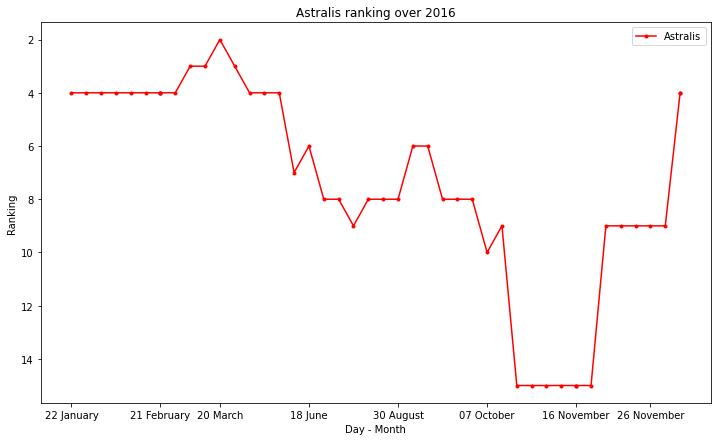

In [53]:
plt.figure(figsize=(12,7)) 
plt.title("Astralis ranking over 2016")
plt.plot(astralis.match_day_month,astralis.Astralis,"r.-",label = "Astralis")
plt.gca().invert_yaxis()
plt.ylabel("Ranking")
plt.xlabel("Day - Month")
plt.legend()
plt.xticks(astralis.match_day_month[::6])
plt.show()

#### comparison of rankings of two teams

In [54]:
navi = year2016.loc[year2016["team_1"]=="NATUS VINCERE",["t1_world_rank","match_day_month"]]
navi.rename(columns={"t1_world_rank":"Natus_Vincere","match_day_month":"match_day"},inplace = True)
navi = navi.reset_index(drop = True)
navi

,Natus_Vincere,match_day
0,2,22 January
1,2,22 January
2,2,09 February
3,2,11 February
4,2,17 February
5,2,24 February
6,2,10 March
7,3,15 March
8,3,20 March
9,2,29 March


In [55]:
comp2teams = pd.merge(astralis,navi,left_index=True,right_index=True)
comp2teams

,Astralis,match_day_month,Natus_Vincere,match_day
0,4,22 January,2,22 January
1,4,09 February,2,22 January
2,4,10 February,2,09 February
3,4,16 February,2,11 February
4,4,19 February,2,17 February
5,4,20 February,2,24 February
6,4,21 February,2,10 March
7,4,21 February,3,15 March
8,4,21 February,3,20 March
9,4,24 February,2,29 March


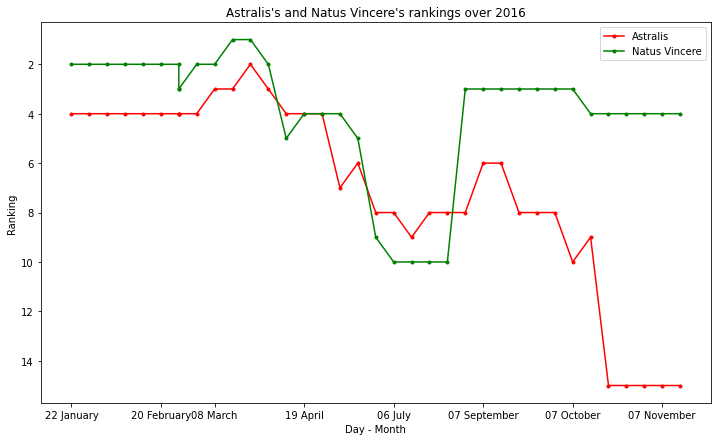

In [56]:
plt.figure(figsize=(12,7)) 
plt.title("Astralis's and Natus Vincere's rankings over 2016")
plt.plot(comp2teams.match_day_month,comp2teams.Astralis,"r.-",label = "Astralis")
plt.plot(comp2teams.match_day_month,comp2teams.Natus_Vincere,"g.-",label = "Natus Vincere")
plt.gca().invert_yaxis()
plt.ylabel("Ranking")
plt.xlabel("Day - Month")
plt.legend()
plt.xticks(comp2teams.match_day_month[::5])
plt.show()

#### 7) Top 10 teams in a year.

In [57]:
year2017

,match_date,team_1,team_2,t1_match_score,t2_match_score,t1_world_rank,t2_world_rank,t1_h2h_win_perc,t2_h2h_win_perc,result,...,t2_player3_is_sniper,t2_player4_impact,t2_player4_is_sniper,t2_player5_impact,t2_player5_is_sniper,No_of_rounds_played,winners,match_day_month,Round_differential,year
617,2017-01-22,ASTRALIS,GODSENT,6,16,1,16,0.512821,0.487179,t2,...,False,1.27,True,0.80,False,22,GODSENT,22 January,10,2017
618,2017-01-22,LIQUID,ENVY,21,25,17,8,0.500000,0.500000,t2,...,False,1.04,False,0.90,False,46,ENVY,22 January,4,2017
619,2017-01-22,NATUS VINCERE,MOUSESPORTS,16,3,11,12,0.529412,0.470588,t1,...,True,0.88,False,0.86,False,19,NATUS VINCERE,22 January,13,2017
620,2017-01-22,FLIPSID3,FAZE,9,16,18,7,0.333333,0.666667,t2,...,True,1.06,False,0.81,False,25,FAZE,22 January,7,2017
621,2017-01-22,SK,HELLRAISERS,16,7,3,19,1.000000,0.000000,t1,...,True,1.01,False,0.95,False,23,SK,22 January,9,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,2017-12-15,OPTIC,MOUSESPORTS,16,4,12,15,0.500000,0.500000,t1,...,False,1.02,True,0.92,False,20,OPTIC,15 December,12,2017
1352,2017-12-15,FNATIC,OPTIC,16,2,8,12,0.666667,0.333333,t1,...,True,0.98,False,0.89,False,18,FNATIC,15 December,14,2017
1353,2017-12-15,CLOUD9,ASTRALIS,11,16,5,3,0.600000,0.400000,t2,...,False,0.99,False,1.00,False,27,ASTRALIS,15 December,5,2017
1354,2017-12-15,FAZE,LIQUID,16,12,2,10,1.000000,0.000000,t1,...,False,0.95,False,0.92,True,28,FAZE,15 December,4,2017


In [58]:
print(year2017['team_1'].nunique())
print(year2017['team_2'].nunique())

27
27


In [59]:
topteams = year2017[["team_1","t1_world_rank"]]

In [60]:
topteams

,team_1,t1_world_rank
617,ASTRALIS,1
618,LIQUID,17
619,NATUS VINCERE,11
620,FLIPSID3,18
621,SK,3
...,...,...
1351,OPTIC,12
1352,FNATIC,8
1353,CLOUD9,5
1354,FAZE,2


In [61]:
topteams = topteams.drop_duplicates(subset="t1_world_rank",keep="last")
topteams = topteams.sort_values("t1_world_rank")
topteams.rename(columns = {"team_1":"Team Name","t1_world_rank":"World Rank"}) 

,Team Name,World Rank
1349,SK,1
1354,FAZE,2
1355,ASTRALIS,3
1343,NIP,4
1353,CLOUD9,5
1317,CLOUD9,6
1350,NORTH,7
1352,FNATIC,8
1339,GAMBIT,9
1314,LIQUID,10


Here we can see the list of top 20 teams at the end of 2016 


#### 8) Players impact (Snipers vs Non snipers).

In [62]:
df

,match_date,team_1,team_2,t1_match_score,t2_match_score,t1_world_rank,t2_world_rank,t1_h2h_win_perc,t2_h2h_win_perc,result,...,t2_player3_is_sniper,t2_player4_impact,t2_player4_is_sniper,t2_player5_impact,t2_player5_is_sniper,No_of_rounds_played,winners,match_day_month,Round_differential,year
0,2016-01-22,NATUS VINCERE,SK,16,3,2,19,1.000000,0.000000,t1,...,True,1.00,False,1.17,False,19,NATUS VINCERE,22 January,13,2016
1,2016-01-22,LUMINOSITY,FAZE,9,16,6,8,1.000000,0.000000,t2,...,False,1.01,True,0.76,False,25,FAZE,22 January,7,2016
2,2016-01-22,ASTRALIS,DIGNITAS,16,9,4,14,0.666667,0.333333,t1,...,False,1.15,False,1.38,False,25,ASTRALIS,22 January,7,2016
3,2016-01-22,NATUS VINCERE,FAZE,16,9,2,8,0.461538,0.538462,t1,...,False,1.01,True,0.76,False,25,NATUS VINCERE,22 January,7,2016
4,2016-01-22,MOUSESPORTS,ASTRALIS,19,22,12,4,0.333333,0.666667,t2,...,False,0.98,False,0.76,True,41,ASTRALIS,22 January,3,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,2020-06-02,FURIA,GEN.G,16,8,8,14,0.333333,0.666667,t1,...,True,0.95,False,0.80,False,24,FURIA,02 June,8,2020
2042,2020-06-03,EVIL GENIUSES,CLOUD9,16,14,9,16,0.333333,0.666667,t1,...,True,0.97,False,0.81,False,30,EVIL GENIUSES,03 June,2,2020
2043,2020-06-03,ASTRALIS,VITALITY,6,16,2,10,0.750000,0.250000,t2,...,False,0.95,False,0.95,False,22,VITALITY,03 June,10,2020
2044,2020-06-03,FNATIC,MOUSESPORTS,16,14,3,5,0.437500,0.562500,t1,...,True,0.79,True,0.90,False,30,FNATIC,03 June,2,2020


In [63]:
impact = df[["t1_player1_impact","t1_player2_impact","t1_player3_impact","t1_player4_impact","t1_player5_impact",
             "t2_player1_impact","t2_player2_impact","t2_player3_impact","t2_player4_impact","t2_player5_impact"]]
impact

,t1_player1_impact,t1_player2_impact,t1_player3_impact,t1_player4_impact,t1_player5_impact,t2_player1_impact,t2_player2_impact,t2_player3_impact,t2_player4_impact,t2_player5_impact
0,1.35,1.08,1.06,0.99,1.07,1.02,0.96,0.73,1.00,1.17
1,1.16,1.11,1.27,1.18,0.83,0.99,1.01,0.95,1.01,0.76
2,1.02,1.22,0.89,0.98,0.76,1.50,0.90,1.03,1.15,1.38
3,1.35,1.08,1.06,0.99,1.07,0.99,1.01,0.95,1.01,0.76
4,1.42,1.04,1.10,0.66,1.11,1.02,1.22,0.89,0.98,0.76
...,...,...,...,...,...,...,...,...,...,...
2041,1.09,1.09,1.04,1.23,0.88,1.14,1.05,1.04,0.95,0.80
2042,1.08,1.10,1.04,1.00,0.84,1.18,1.06,1.05,0.97,0.81
2043,1.31,1.14,1.12,0.86,0.70,1.24,0.96,0.89,0.95,0.95
2044,1.20,1.10,0.98,1.11,0.83,1.06,1.02,1.01,0.79,0.90


In [64]:
issniper = df[["t1_player1_is_sniper","t1_player2_is_sniper","t1_player3_is_sniper","t1_player4_is_sniper","t1_player5_is_sniper",
               "t2_player1_is_sniper","t2_player2_is_sniper","t2_player3_is_sniper","t2_player4_is_sniper","t2_player5_is_sniper"]]

issniper

,t1_player1_is_sniper,t1_player2_is_sniper,t1_player3_is_sniper,t1_player4_is_sniper,t1_player5_is_sniper,t2_player1_is_sniper,t2_player2_is_sniper,t2_player3_is_sniper,t2_player4_is_sniper,t2_player5_is_sniper
0,True,False,False,False,False,False,False,True,False,False
1,False,False,True,False,False,False,False,False,True,False
2,True,False,False,False,True,False,False,False,False,False
3,True,False,False,False,False,False,False,False,True,False
4,False,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
2041,False,False,True,False,False,False,False,True,False,False
2042,False,True,False,False,False,False,True,True,False,False
2043,True,False,False,False,False,True,False,False,False,False
2044,False,False,False,True,False,False,False,True,True,False


In [65]:
data = df[["t1_player1_impact","t1_player1_is_sniper"]]
data

,t1_player1_impact,t1_player1_is_sniper
0,1.35,True
1,1.16,False
2,1.02,True
3,1.35,True
4,1.42,False
...,...,...
2041,1.09,False
2042,1.08,False
2043,1.31,True
2044,1.20,False


In [66]:
#formatted strings / %d

In [67]:
list = [1,2,3,4,5]

non_sniper_player = []
sniper_player= []

In [68]:
for n in list: 
    data = df[[f"t1_player{n}_impact",f"t1_player{n}_is_sniper"]]
    non_sniper = data[(data[f"t1_player{n}_is_sniper"]==False)]
    sniper = data[(data[f"t1_player{n}_is_sniper"]==True)]
    non_sniper_player.append(non_sniper[f"t1_player{n}_impact"].mean())
    sniper_player.append(sniper[f"t1_player{n}_impact"].mean())

In [69]:
print(non_sniper_player)
print(sniper_player)

[1.2221543681085671, 1.1447947019867528, 1.0683399209486122, 1.0076353790613761, 0.9192100840336127]
[1.2495617070357539, 1.1634328358208936, 1.104564393939394, 1.0508593750000006, 0.9640229885057474]


In [70]:
from statistics import mean
print(mean(non_sniper_player))
print(mean(sniper_player))

1.072426890827784
1.1064882600603578


Here we can see that on an average the impact of a sniper player is greater than a non sniper/rifle player

### Predicting match winner with the help of ML

In [71]:
newdata = "C:/Users/coloR_/Desktop/Data Analysis with Numpy, Pandas and Matplotlib/Numpy, Pandas and Matplotlib/csgo_clean_data.csv"
df = pd.read_csv(newdata)
df

,match_date,team_1,team_2,t1_match_score,t2_match_score,t1_world_rank,t2_world_rank,t1_h2h_win_perc,t2_h2h_win_perc,result,...,t2_player2_impact,t2_player2_is_sniper,t2_player3_impact,t2_player3_is_sniper,t2_player4_impact,t2_player4_is_sniper,t2_player5_impact,t2_player5_is_sniper,No_of_rounds_played,winners
0,2016-01-22,NATUS VINCERE,SK,16,3,2,19,1.000000,0.000000,t1,...,0.96,False,0.73,True,1.00,False,1.17,False,19,NATUS VINCERE
1,2016-01-22,LUMINOSITY,FAZE,9,16,6,8,1.000000,0.000000,t2,...,1.01,False,0.95,False,1.01,True,0.76,False,25,FAZE
2,2016-01-22,ASTRALIS,DIGNITAS,16,9,4,14,0.666667,0.333333,t1,...,0.90,False,1.03,False,1.15,False,1.38,False,25,ASTRALIS
3,2016-01-22,NATUS VINCERE,FAZE,16,9,2,8,0.461538,0.538462,t1,...,1.01,False,0.95,False,1.01,True,0.76,False,25,NATUS VINCERE
4,2016-01-22,MOUSESPORTS,ASTRALIS,19,22,12,4,0.333333,0.666667,t2,...,1.22,False,0.89,False,0.98,False,0.76,True,41,ASTRALIS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,2020-06-02,FURIA,GEN.G,16,8,8,14,0.333333,0.666667,t1,...,1.05,False,1.04,True,0.95,False,0.80,False,24,FURIA
2042,2020-06-03,EVIL GENIUSES,CLOUD9,16,14,9,16,0.333333,0.666667,t1,...,1.06,True,1.05,True,0.97,False,0.81,False,30,EVIL GENIUSES
2043,2020-06-03,ASTRALIS,VITALITY,6,16,2,10,0.750000,0.250000,t2,...,0.96,False,0.89,False,0.95,False,0.95,False,22,VITALITY
2044,2020-06-03,FNATIC,MOUSESPORTS,16,14,3,5,0.437500,0.562500,t1,...,1.02,False,1.01,True,0.79,True,0.90,False,30,FNATIC


In [72]:
df.dtypes

match_date               object
team_1                   object
team_2                   object
t1_match_score            int64
t2_match_score            int64
t1_world_rank             int64
t2_world_rank             int64
t1_h2h_win_perc         float64
t2_h2h_win_perc         float64
result                   object
t1_player1_impact       float64
t1_player1_is_sniper       bool
t1_player2_impact       float64
t1_player2_is_sniper       bool
t1_player3_impact       float64
t1_player3_is_sniper       bool
t1_player4_impact       float64
t1_player4_is_sniper       bool
t1_player5_impact       float64
t1_player5_is_sniper       bool
t2_player1_impact       float64
t2_player1_is_sniper       bool
t2_player2_impact       float64
t2_player2_is_sniper       bool
t2_player3_impact       float64
t2_player3_is_sniper       bool
t2_player4_impact       float64
t2_player4_is_sniper       bool
t2_player5_impact       float64
t2_player5_is_sniper       bool
No_of_rounds_played       int64
winners 

In [73]:
df['match_date']=pd.to_datetime(df['match_date'])
df

,match_date,team_1,team_2,t1_match_score,t2_match_score,t1_world_rank,t2_world_rank,t1_h2h_win_perc,t2_h2h_win_perc,result,...,t2_player2_impact,t2_player2_is_sniper,t2_player3_impact,t2_player3_is_sniper,t2_player4_impact,t2_player4_is_sniper,t2_player5_impact,t2_player5_is_sniper,No_of_rounds_played,winners
0,2016-01-22,NATUS VINCERE,SK,16,3,2,19,1.000000,0.000000,t1,...,0.96,False,0.73,True,1.00,False,1.17,False,19,NATUS VINCERE
1,2016-01-22,LUMINOSITY,FAZE,9,16,6,8,1.000000,0.000000,t2,...,1.01,False,0.95,False,1.01,True,0.76,False,25,FAZE
2,2016-01-22,ASTRALIS,DIGNITAS,16,9,4,14,0.666667,0.333333,t1,...,0.90,False,1.03,False,1.15,False,1.38,False,25,ASTRALIS
3,2016-01-22,NATUS VINCERE,FAZE,16,9,2,8,0.461538,0.538462,t1,...,1.01,False,0.95,False,1.01,True,0.76,False,25,NATUS VINCERE
4,2016-01-22,MOUSESPORTS,ASTRALIS,19,22,12,4,0.333333,0.666667,t2,...,1.22,False,0.89,False,0.98,False,0.76,True,41,ASTRALIS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,2020-06-02,FURIA,GEN.G,16,8,8,14,0.333333,0.666667,t1,...,1.05,False,1.04,True,0.95,False,0.80,False,24,FURIA
2042,2020-06-03,EVIL GENIUSES,CLOUD9,16,14,9,16,0.333333,0.666667,t1,...,1.06,True,1.05,True,0.97,False,0.81,False,30,EVIL GENIUSES
2043,2020-06-03,ASTRALIS,VITALITY,6,16,2,10,0.750000,0.250000,t2,...,0.96,False,0.89,False,0.95,False,0.95,False,22,VITALITY
2044,2020-06-03,FNATIC,MOUSESPORTS,16,14,3,5,0.437500,0.562500,t1,...,1.02,False,1.01,True,0.79,True,0.90,False,30,FNATIC


To predict match winner first we need to set some parameter which we can feed into ML model in order to predict the winner. We have some parameters already present i.e. world rank, head to head win percentage.

In [74]:
df["team2"] = df["team_2"].astype("category").cat.codes
df

,match_date,team_1,team_2,t1_match_score,t2_match_score,t1_world_rank,t2_world_rank,t1_h2h_win_perc,t2_h2h_win_perc,result,...,t2_player2_is_sniper,t2_player3_impact,t2_player3_is_sniper,t2_player4_impact,t2_player4_is_sniper,t2_player5_impact,t2_player5_is_sniper,No_of_rounds_played,winners,team2
0,2016-01-22,NATUS VINCERE,SK,16,3,2,19,1.000000,0.000000,t1,...,False,0.73,True,1.00,False,1.17,False,19,NATUS VINCERE,46
1,2016-01-22,LUMINOSITY,FAZE,9,16,6,8,1.000000,0.000000,t2,...,False,0.95,False,1.01,True,0.76,False,25,FAZE,16
2,2016-01-22,ASTRALIS,DIGNITAS,16,9,4,14,0.666667,0.333333,t1,...,False,1.03,False,1.15,False,1.38,False,25,ASTRALIS,9
3,2016-01-22,NATUS VINCERE,FAZE,16,9,2,8,0.461538,0.538462,t1,...,False,0.95,False,1.01,True,0.76,False,25,NATUS VINCERE,16
4,2016-01-22,MOUSESPORTS,ASTRALIS,19,22,12,4,0.333333,0.666667,t2,...,False,0.89,False,0.98,False,0.76,True,41,ASTRALIS,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,2020-06-02,FURIA,GEN.G,16,8,8,14,0.333333,0.666667,t1,...,False,1.04,True,0.95,False,0.80,False,24,FURIA,23
2042,2020-06-03,EVIL GENIUSES,CLOUD9,16,14,9,16,0.333333,0.666667,t1,...,True,1.05,True,0.97,False,0.81,False,30,EVIL GENIUSES,6
2043,2020-06-03,ASTRALIS,VITALITY,6,16,2,10,0.750000,0.250000,t2,...,False,0.89,False,0.95,False,0.95,False,22,VITALITY,55
2044,2020-06-03,FNATIC,MOUSESPORTS,16,14,3,5,0.437500,0.562500,t1,...,False,1.01,True,0.79,True,0.90,False,30,FNATIC,36


In [75]:
df["target"] = (df["result"]=="t1").astype("int")
df

,match_date,team_1,team_2,t1_match_score,t2_match_score,t1_world_rank,t2_world_rank,t1_h2h_win_perc,t2_h2h_win_perc,result,...,t2_player3_impact,t2_player3_is_sniper,t2_player4_impact,t2_player4_is_sniper,t2_player5_impact,t2_player5_is_sniper,No_of_rounds_played,winners,team2,target
0,2016-01-22,NATUS VINCERE,SK,16,3,2,19,1.000000,0.000000,t1,...,0.73,True,1.00,False,1.17,False,19,NATUS VINCERE,46,1
1,2016-01-22,LUMINOSITY,FAZE,9,16,6,8,1.000000,0.000000,t2,...,0.95,False,1.01,True,0.76,False,25,FAZE,16,0
2,2016-01-22,ASTRALIS,DIGNITAS,16,9,4,14,0.666667,0.333333,t1,...,1.03,False,1.15,False,1.38,False,25,ASTRALIS,9,1
3,2016-01-22,NATUS VINCERE,FAZE,16,9,2,8,0.461538,0.538462,t1,...,0.95,False,1.01,True,0.76,False,25,NATUS VINCERE,16,1
4,2016-01-22,MOUSESPORTS,ASTRALIS,19,22,12,4,0.333333,0.666667,t2,...,0.89,False,0.98,False,0.76,True,41,ASTRALIS,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,2020-06-02,FURIA,GEN.G,16,8,8,14,0.333333,0.666667,t1,...,1.04,True,0.95,False,0.80,False,24,FURIA,23,1
2042,2020-06-03,EVIL GENIUSES,CLOUD9,16,14,9,16,0.333333,0.666667,t1,...,1.05,True,0.97,False,0.81,False,30,EVIL GENIUSES,6,1
2043,2020-06-03,ASTRALIS,VITALITY,6,16,2,10,0.750000,0.250000,t2,...,0.89,False,0.95,False,0.95,False,22,VITALITY,55,0
2044,2020-06-03,FNATIC,MOUSESPORTS,16,14,3,5,0.437500,0.562500,t1,...,1.01,True,0.79,True,0.90,False,30,FNATIC,36,1


After setting parameter we must decide which model we need to use in order to predict the winner.

We are using Random Forest Classifier because it consists of a large number of individual decision trees that operate as an ensemble as ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone.

In [76]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, min_samples_split=10, random_state=1)

Here we are setting min_samples_split as 10 because When we increase this parameter, each tree in the forest becomes more constrained as it has to consider more samples at each node.

We are setting random_state as 1 because we want same result everytime

### Splitting training and testing data

In [77]:
df.iloc[1700]

match_date              2018-10-03 00:00:00
team_1                               FNATIC
team_2                               HEROIC
t1_match_score                           13
t2_match_score                           16
t1_world_rank                            18
t2_world_rank                            16
t1_h2h_win_perc                    0.333333
t2_h2h_win_perc                    0.666667
result                                   t2
t1_player1_impact                       1.2
t1_player1_is_sniper                   True
t1_player2_impact                      1.12
t1_player2_is_sniper                  False
t1_player3_impact                      1.04
t1_player3_is_sniper                  False
t1_player4_impact                      0.97
t1_player4_is_sniper                  False
t1_player5_impact                      0.71
t1_player5_is_sniper                  False
t2_player1_impact                      1.11
t2_player1_is_sniper                   True
t2_player2_impact               

In [78]:
train = df[df["match_date"]<"2018-10-03"]
test = df[df["match_date"]>"2018-10-03"]

### Setting predictors and training the model

In [79]:
predictors = ["t2_h2h_win_perc","team2","t2_world_rank"]
rf.fit(train[predictors],train["target"])

RandomForestClassifier(min_samples_split=10, random_state=1)

### Predicting results in testing data

In [80]:
preds = rf.predict(test[predictors])

In [81]:
combined = pd.DataFrame(dict(actual=test["target"],prediction=preds))
pd.crosstab(index=combined["actual"],columns=combined["prediction"])

prediction,0,1
actual,,
0,102,74
1,93,76


### Accuracy of our prediction

In [82]:
from sklearn.metrics import precision_score
precision_score(test["target"],preds)

0.5066666666666667

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2046 entries, 0 to 2045
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   match_date            2046 non-null   datetime64[ns]
 1   team_1                2046 non-null   object        
 2   team_2                2046 non-null   object        
 3   t1_match_score        2046 non-null   int64         
 4   t2_match_score        2046 non-null   int64         
 5   t1_world_rank         2046 non-null   int64         
 6   t2_world_rank         2046 non-null   int64         
 7   t1_h2h_win_perc       2046 non-null   float64       
 8   t2_h2h_win_perc       2046 non-null   float64       
 9   result                2046 non-null   object        
 10  t1_player1_impact     2046 non-null   float64       
 11  t1_player1_is_sniper  2046 non-null   bool          
 12  t1_player2_impact     2046 non-null   float64       
 13  t1_player2_is_snip

### Prediction results

In [84]:
combined = combined.merge(df[["match_date","team_1","team_2","winners"]], left_index=True, right_index=True)
combined

,actual,prediction,match_date,team_1,team_2,winners
1701,1,0,2018-10-04,MOUSESPORTS,G2,MOUSESPORTS
1702,1,1,2018-10-04,ASTRALIS,FAZE,ASTRALIS
1703,0,1,2018-10-04,G2,MOUSESPORTS,MOUSESPORTS
1704,0,0,2018-10-04,FAZE,ASTRALIS,ASTRALIS
1705,0,1,2018-10-04,FAZE,G2,G2
...,...,...,...,...,...,...
2041,1,1,2020-06-02,FURIA,GEN.G,FURIA
2042,1,0,2020-06-03,EVIL GENIUSES,CLOUD9,EVIL GENIUSES
2043,0,1,2020-06-03,ASTRALIS,VITALITY,VITALITY
2044,1,0,2020-06-03,FNATIC,MOUSESPORTS,FNATIC
